# Augmentation Strategies for Enhanced Generalization in Semantic Segmentation


## Introduction

This notebook extends the content of the [Template notebook](./Template.ipynb) by providing an in-depth exploration of the augmentation strategies we adopted for our semantic segmentation recognition task.

The goal is to help users understand and visualize the effects of individual augmentation techniques we applied, as well as their combined impact on images and relative masks.

The following image illustrates a sample image (*Figure 80*) sourced from `mars_for_students.npz`, alongside its variations generated using the set of augmentations tested during the development of our model. This comparison highlights the transformations each augmentation applies and their potential benefits.


**Note:** All auxiliary functions utilized in this notebook are defined in [AugmentationsUtils.py](./AugmentationsUtils.py).


![fig.80_augmented](./images/aug_intro.png)



## Setup and Configuration
Preparing the workspace by mounting the drive, importing libraries, and loading the dataset for processing.

In [ ]:
SEED = 2024

COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/gdrive')
    %cd /gdrive/My Drive/ANN/ANN_Fibo+Fra+Trama+Auro

from AugmentationUtils import *

dataset_path = 'data/mars_for_students.npz'
X_train, y_train = preprocess_data(dataset_path)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1TpLPrhIOAQO4RROYzsy9L9wP58AkN0VD/ANN_Fibo+Fra+Trama+Auro
Available keys in the .npz file: ['training_set', 'test_set']
Number of images in the 'mars_for_students' dataset: 2615


## Original Figures
Below, it is possible to visualize original images from the dataset and corresponding masks.
Here is possible also to plot outliers, that are present in the default version of this notebook.

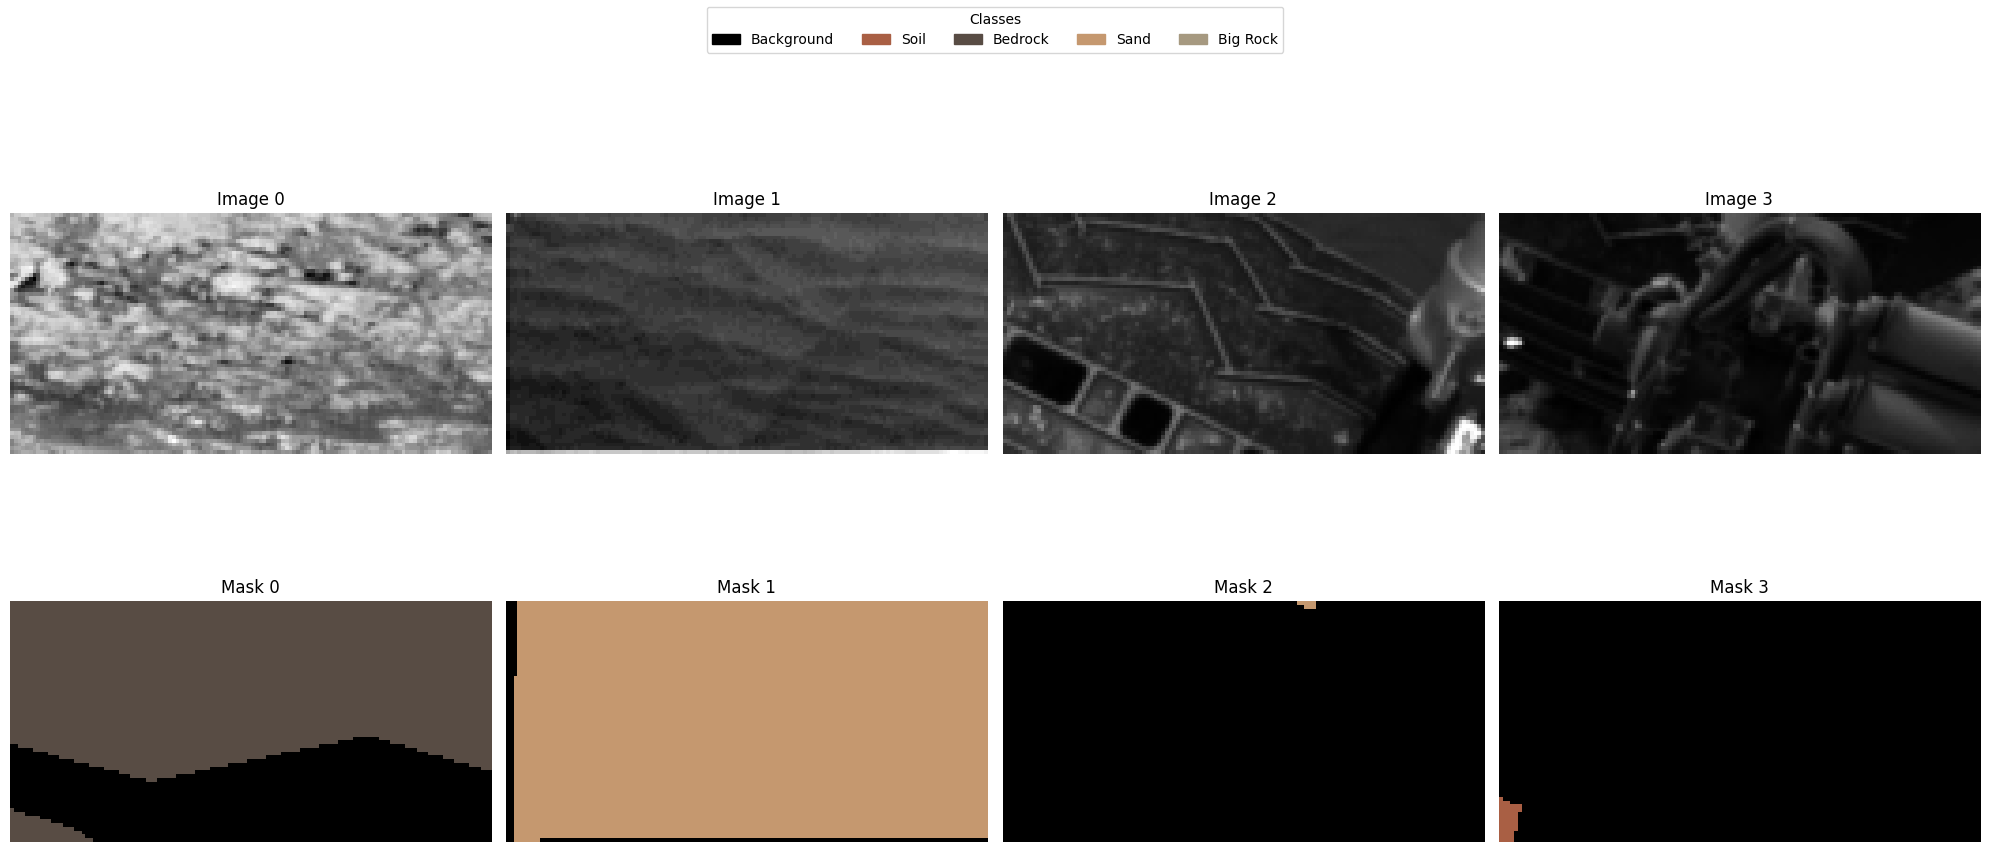

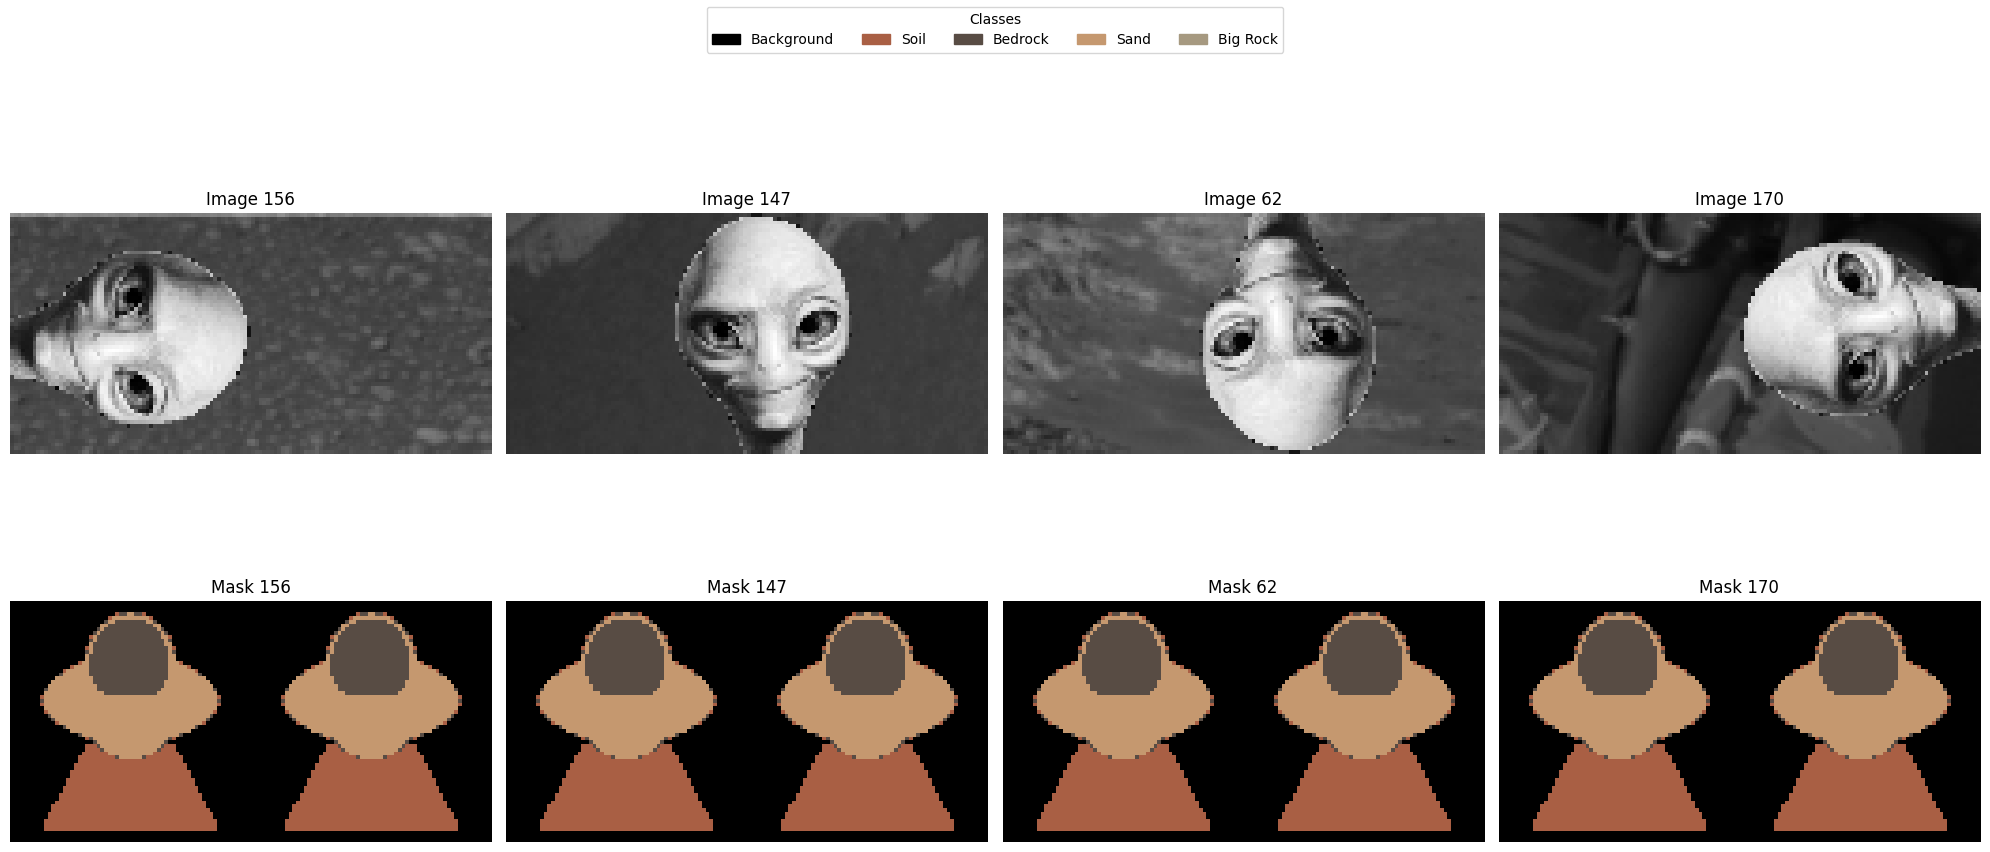

In [6]:
selected_indices = [0, 1, 2, 3]
outliers = [156, 147, 62, 170]

plot_selected_images_and_masks(selected_indices, X_train, y_train)
plot_selected_images_and_masks(outliers, X_train, y_train)

# Augmentations Set
This section presents the set of augmentation we experimented with during the development of an effective training pipeline. Mapping function names to aliases simplifies the subsequent steps, making it easier for users to follow and analyze the individual effects of each augmentation method.

In [7]:
augmentation_functions = {
    "flip": random_flip,             # Randomly flips the image horizontally or vertically
    "rotation": random_rotation,     # Rotates the image by a random angle (e.g., 90°, 180°, 270°)
    "zoom": random_zoom,             # Applies a random zoom in or out to the image
    "shift": random_shift,           # Shifts the image along the x and/or y axis by a random amount
    "elastic": elastic_deformation,  # Applies elastic deformation for smooth, randomized distortions
    "shear": random_shear,           # Shears the image by a random angle within a specified range
    "cutout": cutout                 # Masks out a random square region in the image to simulate occlusion
}

## Single Augmentations

In this section, we focus on applying individual augmentation techniques to selected images to observe their specific effects. By applying one augmentation at a time, users can clearly see how each transformation alters the image and its corresponding mask. This approach facilitates a better understanding of the impact each augmentation method has on the dataset.



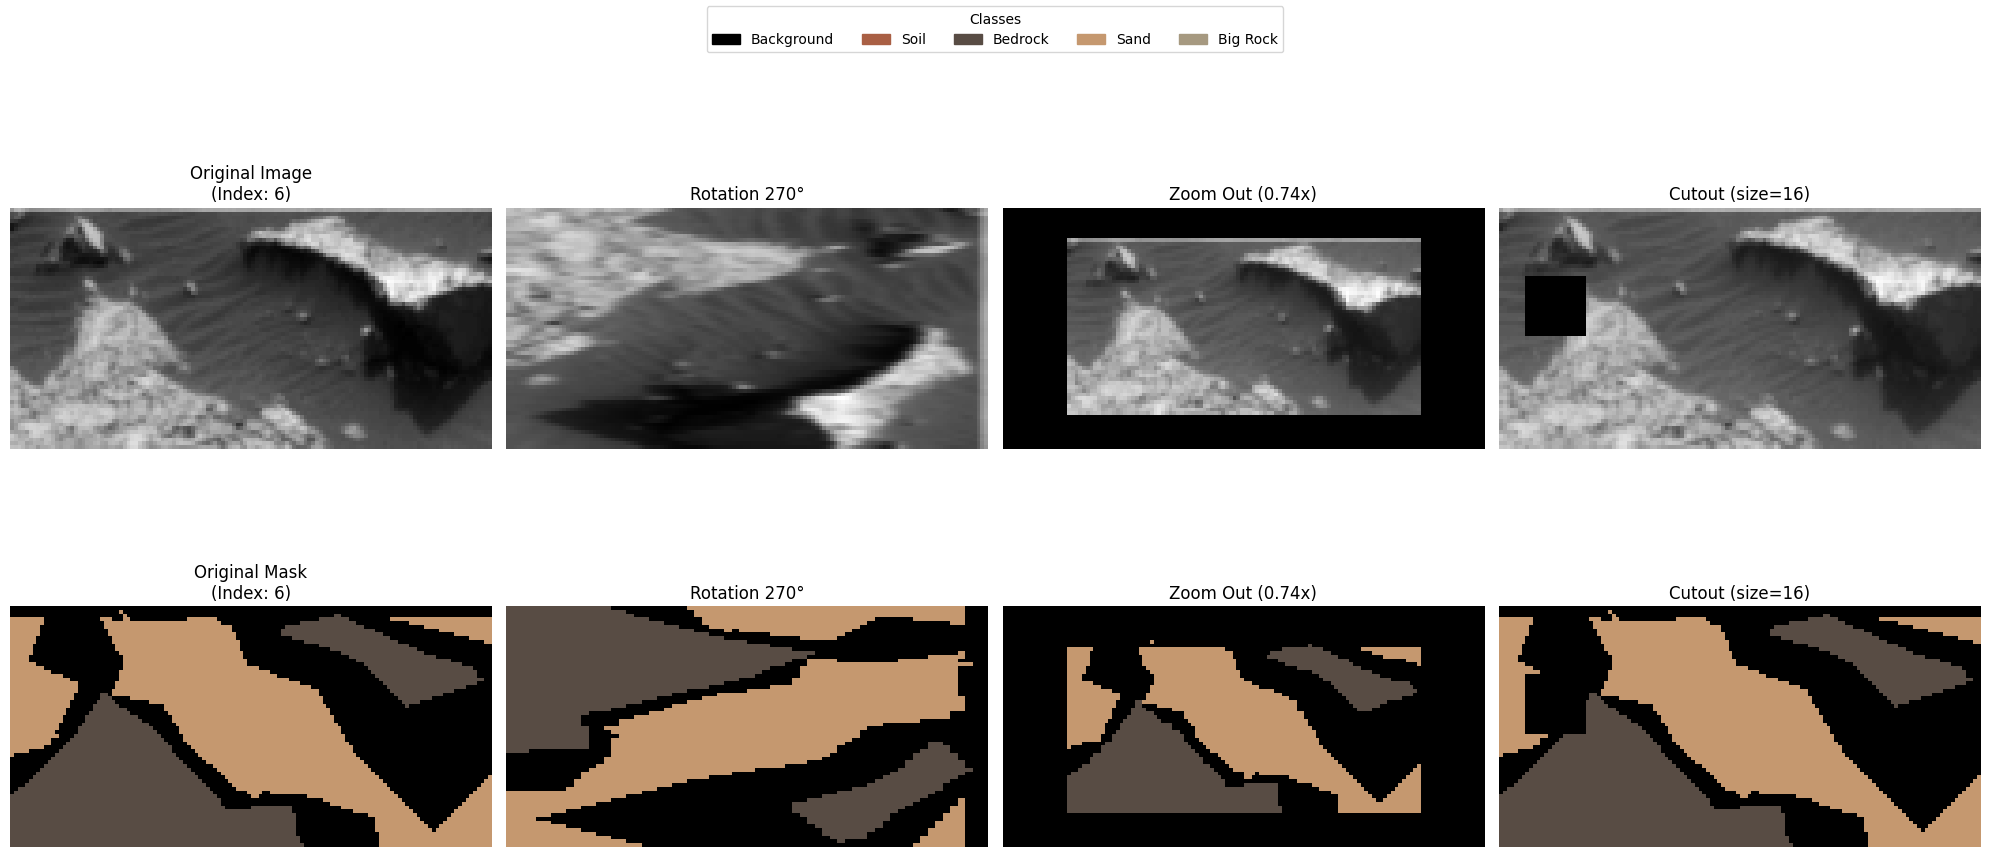

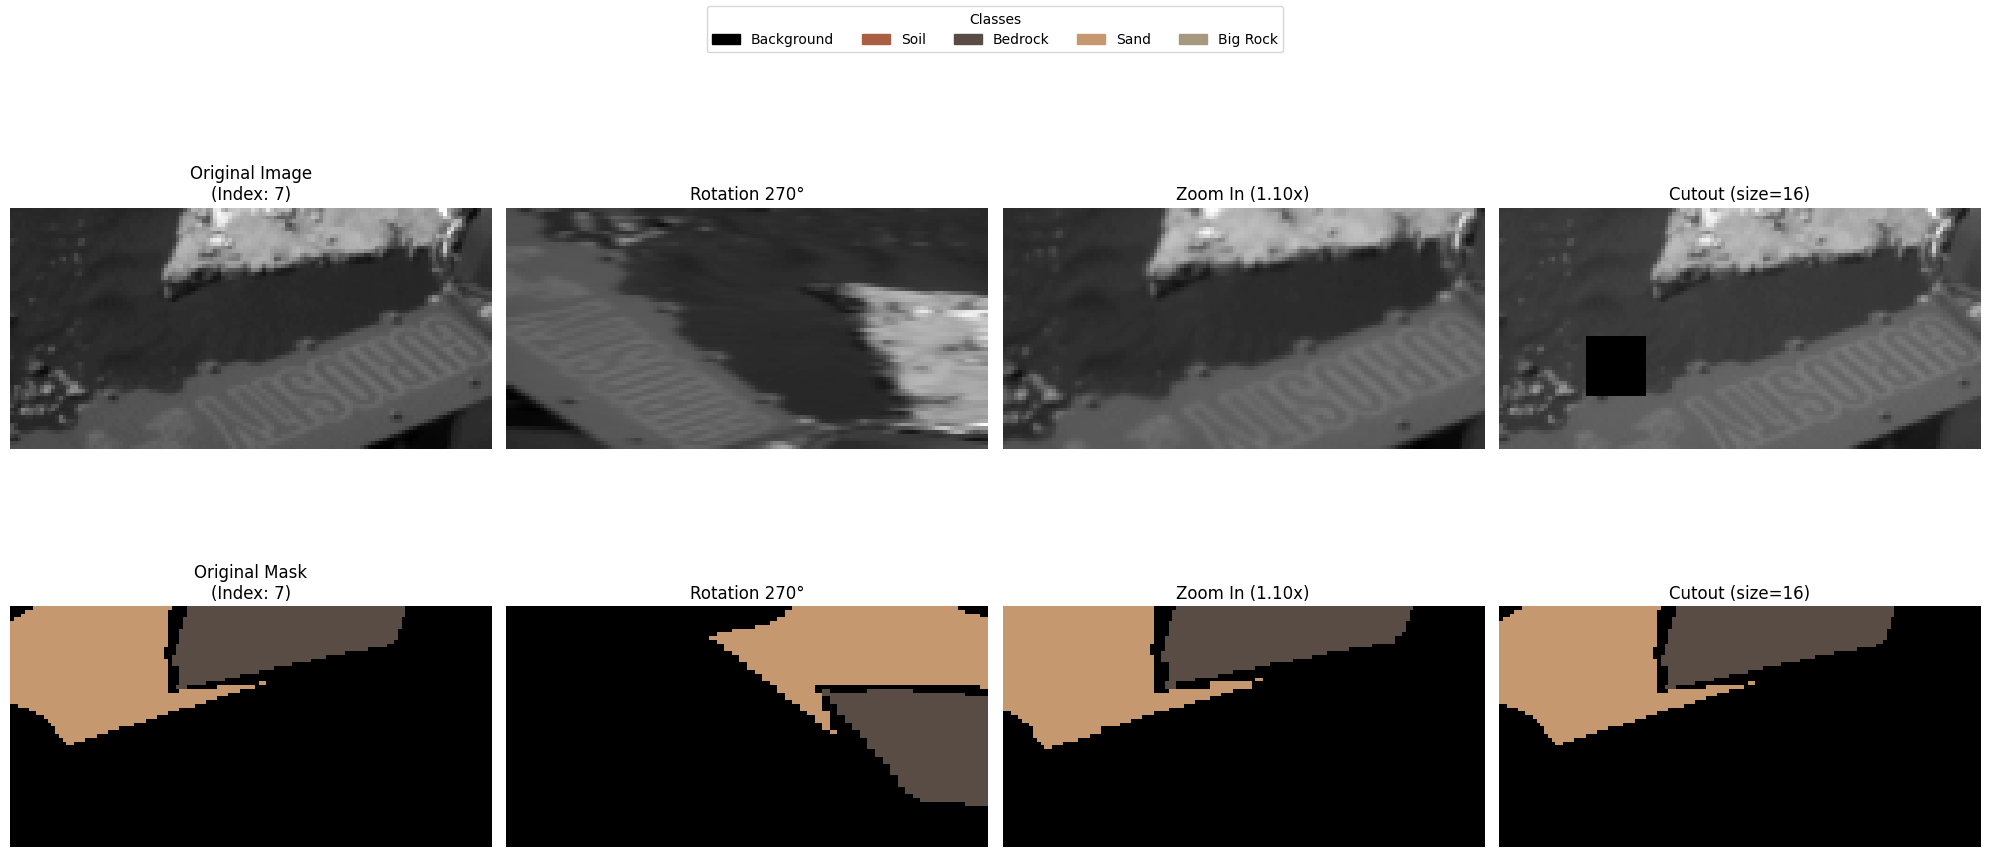

In [8]:
selected_indices = [6, 7]
augmentations_to_apply = ["rotation", "zoom", "cutout"]

plot_single_augmentations(selected_indices, augmentations_to_apply, X_train, y_train)

## Inter-Images Augmentations

This section introduces the capability to combine features from different images to enhance dataset diversity and improve class balancing.

`copy_and_paste` involves extracting portions of images and their corresponding masks that contain uniquely labeled regions. These extracted regions are then overlaid onto random areas of target images.

As with previous augmentations, users can select specific images to visualize the effects. Additionally, users have the flexibility to choose both the target image to be augmented and the source image from which the region is copied.

Note: The source image must contain a uniquely labeled region of the specified region_size.

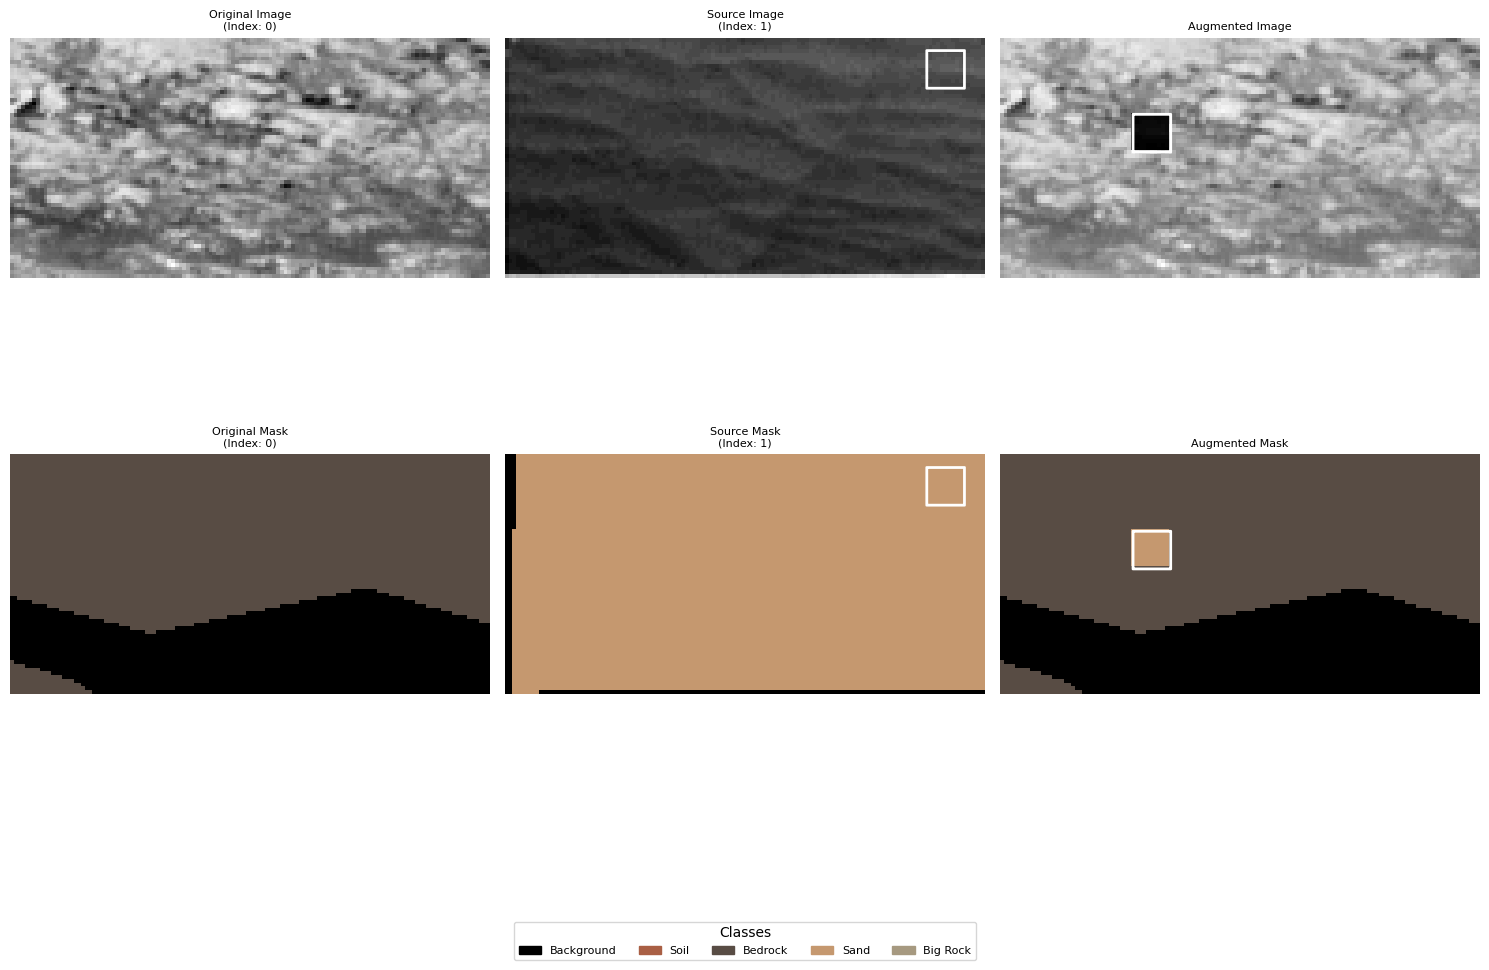

In [10]:
target_idx = 0
source_idx = 1

copy_paste_images_and_plot(target_idx, source_idx, X_train, y_train, region_size=10)

## Augmentation Pipelines

This section showcases the effects of custom augmentation pipelines tailored by the user.

You can create and customize one or more augmentation pipelines by:

1. **Selecting Augmentation List**:
    
    Choose from the variety of augmentation techniques described above.

2. **Enabling Copy and Paste Before Augmenting**:
    
    Optionally apply the **Copy and Paste** augmentation.


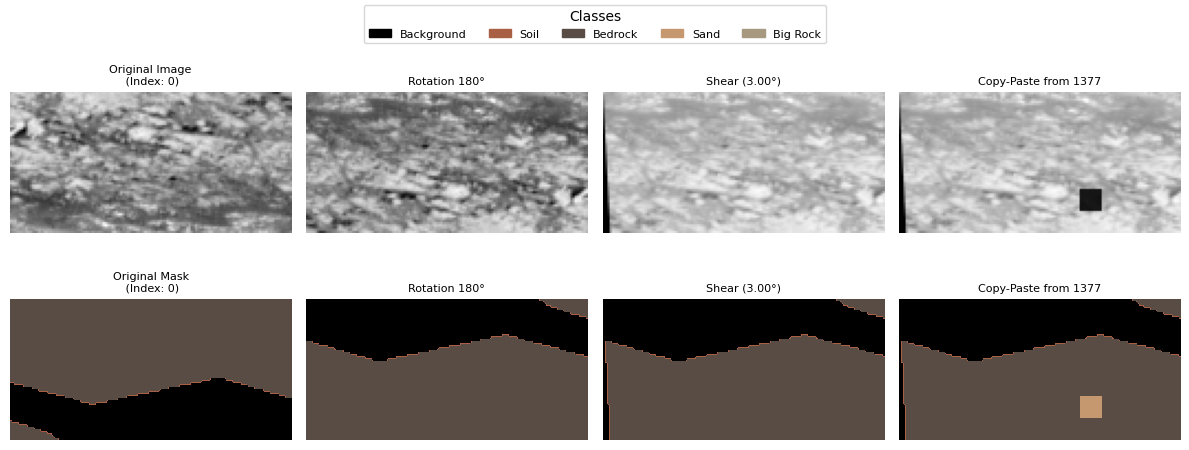

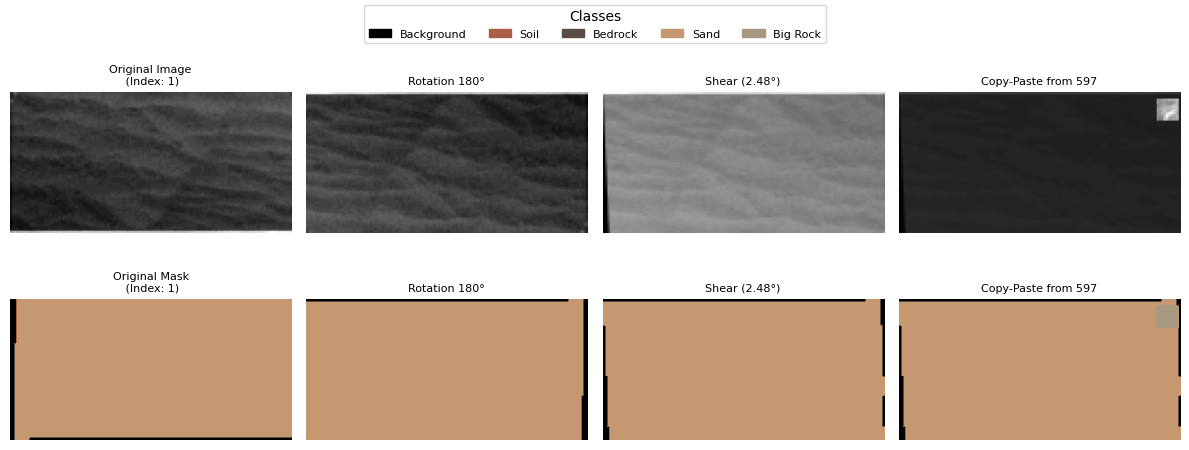

In [11]:
selected_indices = [0, 1]

apply_augmentations_pipeline(selected_indices, ["rotation", "shear"], X_train, y_train, copy_paste=True, region_size=10)

## Wrapping Up
By exploring these options and experimenting with different configurations, users can fine-tune the augmentation process to best suit their unique data and training objectives. This hands-on, customizable approach ensures that the final augmentation pipeline is both effective and aligned with the user's goals.
